In [48]:
##importing all required libraries
import numpy as np
import pandas as pd

import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer

import seaborn as sns
import matplotlib.pyplot as plt

from tqdm.auto import tqdm
import time

from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
#from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from sklearn import metrics

## **Data Collection**

In [49]:
df = pd.read_csv('cyberbullying_tweets.csv')
df

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying
...,...,...
47687,"Black ppl aren't expected to do anything, depe...",ethnicity
47688,Turner did not withhold his disappointment. Tu...,ethnicity
47689,I swear to God. This dumb nigger bitch. I have...,ethnicity
47690,Yea fuck you RT @therealexel: IF YOURE A NIGGE...,ethnicity


In [50]:
df.head()

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying


In [51]:
df.tail()

,tweet_text,cyberbullying_type
47687,"Black ppl aren't expected to do anything, depe...",ethnicity
47688,Turner did not withhold his disappointment. Tu...,ethnicity
47689,I swear to God. This dumb nigger bitch. I have...,ethnicity
47690,Yea fuck you RT @therealexel: IF YOURE A NIGGE...,ethnicity
47691,Bro. U gotta chill RT @CHILLShrammy: Dog FUCK ...,ethnicity


# **Data Statistics**

In [52]:
df.describe()

,tweet_text,cyberbullying_type
count,47692,47692
unique,46017,6
top,RT @sailorhg: the intro for my hardware hackin...,religion
freq,2,7998


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47692 entries, 0 to 47691
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_text          47692 non-null  object
 1   cyberbullying_type  47692 non-null  object
dtypes: object(2)
memory usage: 745.3+ KB


In [54]:
df.size

95384

In [55]:
df.columns

Index(['tweet_text', 'cyberbullying_type'], dtype='object')

## **Handling Null Values**

In [56]:
#cheching any missing values are there
df.isna().any()

,0
tweet_text,False
cyberbullying_type,False


In [57]:
df.isnull().sum()

,0
tweet_text,0
cyberbullying_type,0


In [58]:
## No Null Values in the dataset

## **Data Cleaning**

In [59]:
### Handling duplicate values
df.nunique()

,0
tweet_text,46017
cyberbullying_type,6


In [60]:
df['tweet_text'].nunique()

46017

In [61]:
df.drop_duplicates(inplace = True)

In [62]:
df

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying
...,...,...
47687,"Black ppl aren't expected to do anything, depe...",ethnicity
47688,Turner did not withhold his disappointment. Tu...,ethnicity
47689,I swear to God. This dumb nigger bitch. I have...,ethnicity
47690,Yea fuck you RT @therealexel: IF YOURE A NIGGE...,ethnicity


In [63]:
# actual data set contains 47692 rows and 2 columns
# after removing duplicated rows. unique rows are 47656 rows × 2 columns

In [64]:
df['cyberbullying_type'].value_counts()

,count
cyberbullying_type,
religion,7997
age,7992
ethnicity,7959
gender,7948
not_cyberbullying,7937
other_cyberbullying,7823


In [65]:
#number of rows
len(df)

47656

In [66]:
len(df.columns)

2

## **Exploratory Data Analysis (EDA)**

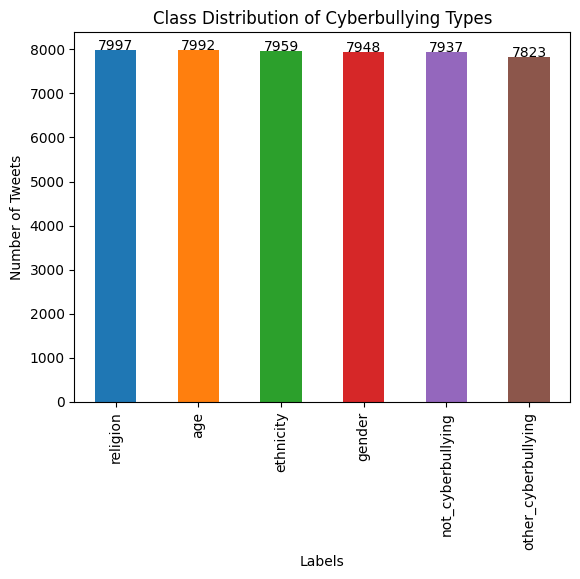

In [67]:

class_counts = df['cyberbullying_type'].value_counts()
ax = class_counts.plot(kind='bar', color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b'])
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 3), textcoords='offset points')

plt.title('Class Distribution of Cyberbullying Types')
plt.xlabel('Labels')
plt.ylabel('Number of Tweets')
plt.show()

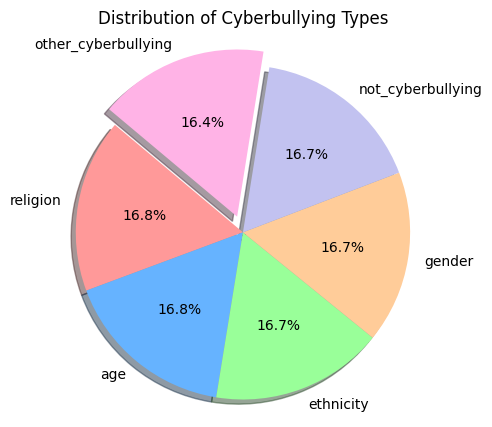

In [69]:
# we can't find difference with bar plot so i with pie chart
cyberbullying_counts = df['cyberbullying_type'].value_counts()
labels = cyberbullying_counts.index.tolist()
sizes = cyberbullying_counts.values.tolist()
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99', '#c2c2f0', '#ffb3e6']
explode = (0, 0, 0, 0, 0, 0.1)  # Explode the last slice for emphasis because other_cyberbullying has low percentage
plt.figure(figsize=(5, 5))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.title('Distribution of Cyberbullying Types')
plt.show()

In [70]:

### not cyberbullying is only 16.7% . remaining 83.3% is cyberbullying

## **Data Preprocessing**

In [71]:
## converting cyberbullying_type from categorical to numerical
#  => 'not_cyberbullying' as 1
#  => 'ethnicity','gender','age','religion','other_cyberbullying' as 0 (means all comes under cyberbullying)


df['cyberbullying_type'].replace(['not_cyberbullying'],
                        [0], inplace=True)
df['cyberbullying_type'].replace(['ethnicity','gender','age','religion','other_cyberbullying'],
                        [1,1,1,1,1], inplace=True)

In [72]:
df

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",0
1,Why is #aussietv so white? #MKR #theblock #ImA...,0
2,@XochitlSuckkks a classy whore? Or more red ve...,0
3,"@Jason_Gio meh. :P thanks for the heads up, b...",0
4,@RudhoeEnglish This is an ISIS account pretend...,0
...,...,...
47687,"Black ppl aren't expected to do anything, depe...",1
47688,Turner did not withhold his disappointment. Tu...,1
47689,I swear to God. This dumb nigger bitch. I have...,1
47690,Yea fuck you RT @therealexel: IF YOURE A NIGGE...,1


Non Cyberbullying (0) :  16.65477589390633 %
Cyberbullying (1) :  83.34522410609367 %


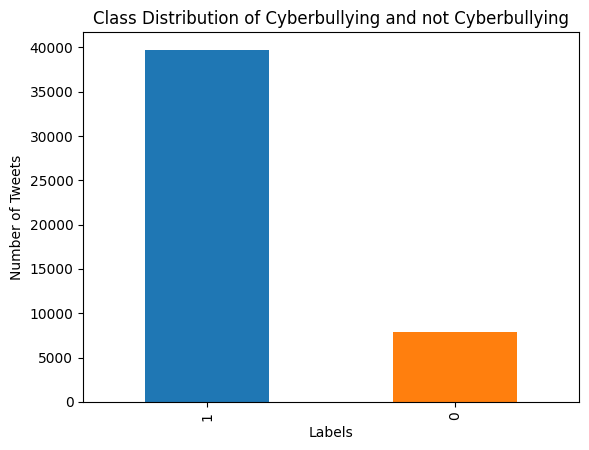

In [73]:
class_counts = df['cyberbullying_type'].value_counts()
class_counts.plot(kind='bar')

print("Non Cyberbullying (0) : ", df.cyberbullying_type.value_counts()[0]/len(df.cyberbullying_type)*100,"%")
print("Cyberbullying (1) : ", df.cyberbullying_type.value_counts()[1]/len(df.cyberbullying_type)*100,"%")
class_counts.plot(kind='bar', color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b'])
plt.title('Class Distribution of Cyberbullying and not Cyberbullying')
plt.xlabel('Labels')
plt.ylabel('Number of Tweets')
plt.show()

In [74]:
df.sample(5)

,tweet_text,cyberbullying_type
20978,"So you're against ""tyranny"" are you? What othe...",1
15243,#MileyCyrus made a #rape joke about date rapin...,1
8715,"Also, 41 is plenty old enough to not be making...",1
35381,Dudes that used to bully me in high school now...,1
33287,Finally watching Gilmore Girls and it's better...,1


In [75]:
# Non Cyberbullying (0) :  16.65477589390633 %
# Cyberbullying (1) :  83.34522410609367 %

In [76]:
## Stop word removal

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [77]:
import re
import string

stop = stopwords.words('english')
regex = re.compile('[%s]' % re.escape(string.punctuation))

def test_re(s):
    return regex.sub('', s)

df['content_without_stopwords'] = df['tweet_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df['content_without_punctuation'] = df['content_without_stopwords'].apply(lambda x: regex.sub('',x))

del df['content_without_stopwords']
del df['tweet_text']


In [78]:
# stemming
porter_stemmer = PorterStemmer()


# punctuation removal
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [79]:
tok_list = []
size = df.shape[0]


# Word Tokenization
for i in range(size):
    word_data = df['content_without_punctuation'].iloc[i]
    nltk_tokens = nltk.word_tokenize(word_data)
    final = ''
    for w in nltk_tokens:
        final = final + ' ' + porter_stemmer.stem(w)
    tok_list.append(final)

df['content_tokenize'] = tok_list
del df['content_without_punctuation']

In [80]:
df

,cyberbullying_type,content_tokenize
0,0,in word katandandr food crapilici mkr
1,0,whi aussietv white mkr theblock imacelebritya...
2,0,xochitlsuckkk classi whore or red velvet cupcak
3,0,jasongio meh p thank head up concern anoth an...
4,0,rudhoeenglish thi isi account pretend kurdish...
...,...,...
47687,1,black ppl expect anyth depend anyth yet free ...
47688,1,turner withhold disappoint turner call court ...
47689,1,i swear god thi dumb nigger bitch i got bleac...
47690,1,yea fuck rt therealexel if your a nigger fuck...


In [81]:
# Digit removal

noNums = []
for i in range(len(df)):
    noNums.append(''.join([i for i in df['content_tokenize'].iloc[i] if not i.isdigit()]))

df['content'] = noNums
df.sample(3)

,cyberbullying_type,content_tokenize,content
33680,1,high school bulli still post facebook,high school bulli still post facebook
37166,1,i alon world weird kid class a littl girl fri...,i alon world weird kid class a littl girl fri...
3933,0,up i dnt want,up i dnt want


## **Feature Extraction using TF - IDF**

In [82]:

from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer, TfidfVectorizer

tfIdfVectorizer = TfidfVectorizer(use_idf = True, sublinear_tf = True)
tfIdf = tfIdfVectorizer.fit_transform(df.content.tolist())

print(tfIdf)
print(tfIdf.shape)

  (0, 32398)	0.22776219121624333
  (0, 9405)	0.6376817433484456
  (0, 15124)	0.39033179447015415
  (0, 27265)	0.4713131550484313
  (0, 52371)	0.2885859145405025
  (0, 24232)	0.28932602455584117
  (1, 13515)	0.19777389209953097
  (1, 52324)	0.37314497266152713
  (1, 34062)	0.3264525192101899
  (1, 45737)	0.3224854116001581
  (1, 46033)	0.3594883054936769
  (1, 48419)	0.18445728871143435
  (1, 24061)	0.3361420787680083
  (1, 47439)	0.3594883054936769
  (1, 51862)	0.14038062006037094
  (1, 3036)	0.37314497266152713
  (1, 51831)	0.16998207614306254
  (1, 32398)	0.1332770108305811
  (2, 9775)	0.4113951233211964
  (2, 50610)	0.44599842347341545
  (2, 40172)	0.30615786633130077
  (2, 35954)	0.26416724056433233
  (2, 51948)	0.323233172611139
  (2, 8167)	0.356988381735929
  (2, 52762)	0.48621199089713685
  :	:
  (47653, 16870)	0.21510693871097084
  (47653, 47873)	0.17046394692995237
  (47654, 47723)	0.5444954256061862
  (47654, 34408)	0.27633185917164826
  (47654, 49987)	0.38999436927636877
  (

In [83]:

df2 = pd.DataFrame(tfIdf[2].T.todense(), index=tfIdfVectorizer.get_feature_names_out(), columns=["TF-IDF"])
df2 = df2.sort_values('TF-IDF', ascending=False)

# top 10 features by TF-IDF score
print(df2.head(10))

                 TF-IDF
xochitlsuckkk  0.486212
velvet         0.445998
cupcak         0.411395
classi         0.356988
whore          0.323233
red            0.306158
or             0.264167
oooooof        0.000000
ooohhh         0.000000
ooohnicol      0.000000


In [84]:
import numpy as np
def display_scores(vectorizer, tfidf_result):
    scores = zip(vectorizer.get_feature_names_out(), np.asarray(tfidf_result.sum(axis=0)).ravel())
    sorted_scores = sorted(scores, key=lambda x: x[1], reverse=True)
    for item in sorted_scores[:25]:  # Display top 25 words
        print(f"{item[0]:50} Scores: {item[1]}")

# showing top 25 words
display_scores(tfIdfVectorizer, tfIdf)

bulli                                              Scores: 1251.2837667790122
school                                             Scores: 1096.9085997343766
fuck                                               Scores: 1078.853341655734
nigger                                             Scores: 863.4160839013988
dumb                                               Scores: 839.5049033462857
like                                               Scores: 764.8531740501221
girl                                               Scores: 754.5279683079167
high                                               Scores: 753.5886777621921
joke                                               Scores: 701.0940532236865
you                                                Scores: 646.6129126621196
rt                                                 Scores: 628.2177755560476
peopl                                              Scores: 613.945821723056
rape                                               Scores: 610.637708913739

## **Data Splitting, Training and Data Resampling**

In [85]:

X = tfIdf
y = np.array(df['cyberbullying_type'])

#splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(38124, 53807)
(38124,)
(9532, 53807)
(9532,)


In [86]:
# Training data
unique_elements, counts_elements = np.unique(y_train,return_counts = True)
print(np.asarray((unique_elements, counts_elements)))

# Test data
unique_elements, counts_elements = np.unique(y_test,return_counts = True)
print(np.asarray((unique_elements, counts_elements)))

#random oversampling on traning data
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy = 'not majority')
X_over, y_over = oversample.fit_resample(X_train, y_train)

[[    0     1]
 [ 6364 31760]]
[[   0    1]
 [1573 7959]]


## **Cyberbullying Detection using Machine Learning classification models**

# Evaluating the model's performance using appropriate metrics.

In [87]:
def getStatsFromModel(model):
    print(classification_report(y_test, y_pred))

    from sklearn.metrics import precision_score, recall_score, f1_score


    # Precision
    precision = precision_score(y_test, y_pred, average='weighted') * 100
    print(f"Precision: {precision:.2f}%")

    # Recall
    recall = recall_score(y_test, y_pred, average='weighted') * 100
    print(f"Recall: {recall:.2f}%")

    # F1-Score
    f1 = f1_score(y_test, y_pred, average='weighted') * 100
    print(f"F1-Score: {f1:.2f}%")

    y_pred_proba = model.predict_proba(X_test_reduced)[:, 1]
    precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
    plt.figure(figsize=(4,4))
    plt.plot(recall, precision, marker='.')
    plt.title('Precision-Recall Curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.show()

    # Plot ROC curve
    logit_roc_auc = roc_auc_score(y_test, y_pred_proba)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    plt.figure(figsize=(4, 4))
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % logit_roc_auc)
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0.0, 0.1])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

In [88]:
## my data is too large, it does't take large data so i reduced dimensions
# MemoryError: Unable to allocate 25.5 GiB for an array with shape (63520, 53807) and data type float64

# Apply TruncatedSVD to reduce dimensionality
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=100)

X_over_reduced = svd.fit_transform(X_over)
X_test_reduced = svd.transform(X_test)


## Gaussian Naive Baye

Accuracy:  0.7358371800251784
Accuracy Percentage: 73.58%
Confusion Matrix: 
 [[1376  197]
 [2321 5638]]
              precision    recall  f1-score   support

           0       0.37      0.87      0.52      1573
           1       0.97      0.71      0.82      7959

    accuracy                           0.74      9532
   macro avg       0.67      0.79      0.67      9532
weighted avg       0.87      0.74      0.77      9532

Precision: 86.82%
Recall: 73.58%
F1-Score: 76.87%


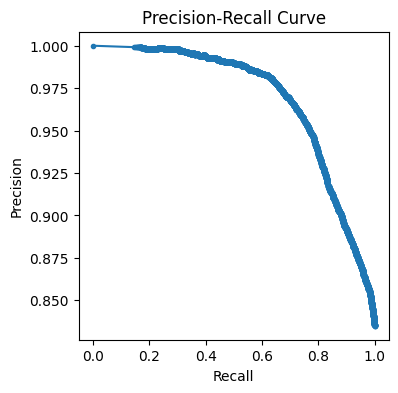

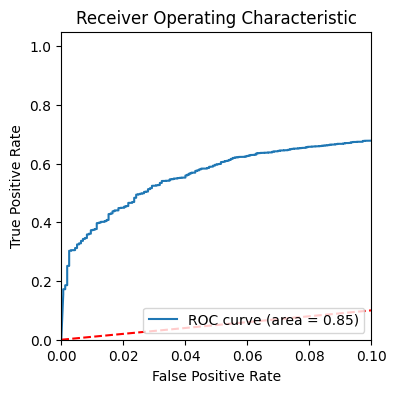

In [41]:
# Gaussian Naive Baye

gnb = GaussianNB()
gnbmodel = gnb.fit(X_over_reduced, y_over)

# Make predictions
y_pred = gnbmodel.predict(X_test_reduced)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)
print(f"Accuracy Percentage: {accuracy * 100:.2f}%")
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
getStatsFromModel(gnb)

The Gaussian Naive Baye model has an accuracy of 73.58%, with a precision of 86.82% and a recall of 73.58%. The F1-score is 76.87%, indicating a good balance between precision and recall. The model performs well in predicting the positive class (1) with high precision but shows a lower recall for the negative class (0), resulting in a lower overall accuracy.










## Logistic Regression

Accuracy:  0.7797943768359211
Accuracy Percentage: 77.98%
Confusion Matrix: 
 [[1406  167]
 [1932 6027]]
              precision    recall  f1-score   support

           0       0.42      0.89      0.57      1573
           1       0.97      0.76      0.85      7959

    accuracy                           0.78      9532
   macro avg       0.70      0.83      0.71      9532
weighted avg       0.88      0.78      0.81      9532

Precision: 88.20%
Recall: 77.98%
F1-Score: 80.56%


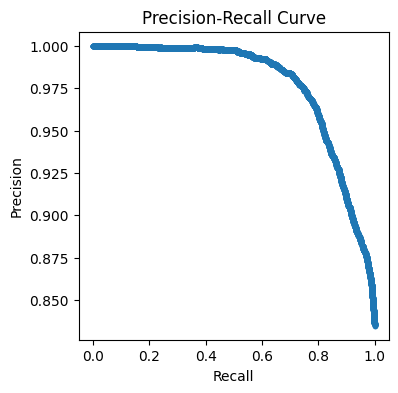

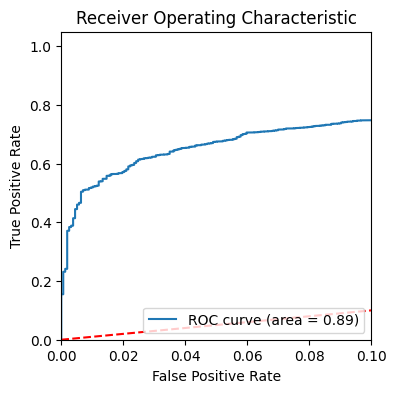

In [42]:
#  Logistic Regression

lgr = LogisticRegression()
lgr.fit(X_over_reduced, y_over)
y_pred = lgr.predict(X_test_reduced)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)
print(f"Accuracy Percentage: {accuracy * 100:.2f}%")
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
getStatsFromModel(lgr)


The Logistic model achieves an accuracy of 77.98%, with a precision of 88.20% and a recall of 77.98%. The F1-score is 80.56%, reflecting a solid performance overall. The model is effective at predicting the positive class (1) with high precision, while also maintaining a strong recall for the negative class (0).








## Decision Tree Classifier

Accuracy:  0.8041334452370961
Accuracy Percentage: 80.41%
Confusion Matrix: 
 [[ 663  910]
 [ 957 7002]]
              precision    recall  f1-score   support

           0       0.41      0.42      0.42      1573
           1       0.88      0.88      0.88      7959

    accuracy                           0.80      9532
   macro avg       0.65      0.65      0.65      9532
weighted avg       0.81      0.80      0.81      9532

Precision: 80.65%
Recall: 80.41%
F1-Score: 80.53%


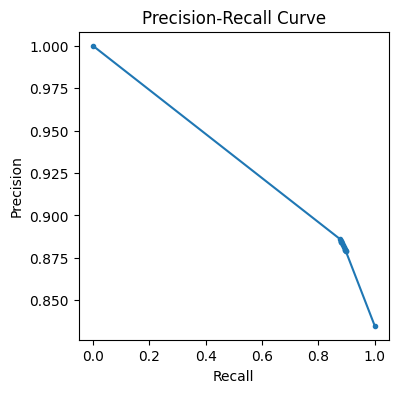

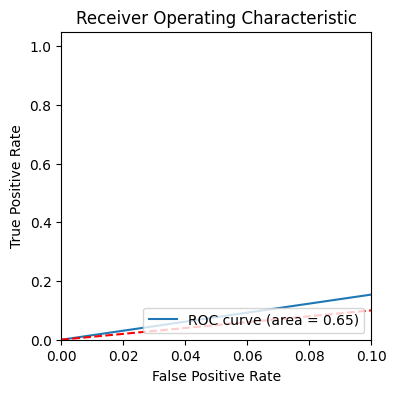

In [43]:
# Decision Tree Classifier

dtc = DecisionTreeClassifier()
dtc.fit(X_over_reduced, y_over)
y_pred = dtc.predict(X_test_reduced)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)
print(f"Accuracy Percentage: {accuracy * 100:.2f}%")
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
getStatsFromModel(dtc)

The Decision Tree Classifier model achieves an accuracy of 80.41%, with a precision of 80.65% and a recall of 80.41%. The F1-score is 80.53%, indicating a balanced performance overall. The model performs consistently for both the positive (1) and negative (0) classes, with similar precision and recall values.

## Ensemble methods - Adaboost Classifier

Accuracy:  0.8041334452370961
Accuracy Percentage: 80.41%
Confusion Matrix: 
 [[1356  217]
 [1926 6033]]
              precision    recall  f1-score   support

           0       0.41      0.86      0.56      1573
           1       0.97      0.76      0.85      7959

    accuracy                           0.78      9532
   macro avg       0.69      0.81      0.70      9532
weighted avg       0.87      0.78      0.80      9532

Precision: 87.42%
Recall: 77.52%
F1-Score: 80.12%


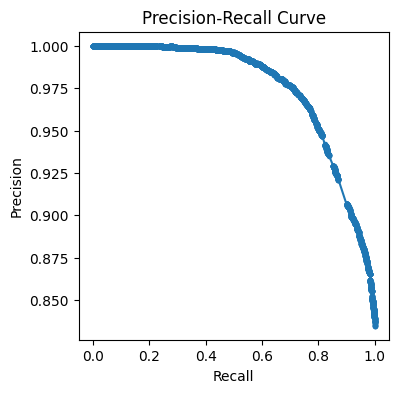

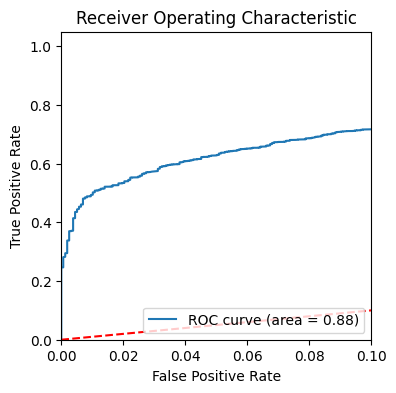

In [44]:
# Ensemble methods - Adaboost Classifier

abc = AdaBoostClassifier()
abc.fit(X_over_reduced, y_over)
y_pred = abc.predict(X_test_reduced)

print("Accuracy: ", accuracy)
print(f"Accuracy Percentage: {accuracy * 100:.2f}%")
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
getStatsFromModel(abc)

The  Adaboost Classifier model achieves an accuracy of 80.41%, with a precision of 87.42% and a recall of 77.52%. The F1-score is 80.12%, indicating a good balance between precision and recall. The model performs well in predicting the positive class (1), while it has a strong recall for the negative class (0), though its precision is somewhat lower.


## Ensemble methods - Random Forest Classifier


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  1.0min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s


Accuracy:  0.8431598825010491
Accuracy Percentage: 84.32%
Confusion Matrix: 
 [[ 654  919]
 [ 576 7383]]
              precision    recall  f1-score   support

           0       0.53      0.42      0.47      1573
           1       0.89      0.93      0.91      7959

    accuracy                           0.84      9532
   macro avg       0.71      0.67      0.69      9532
weighted avg       0.83      0.84      0.84      9532

Precision: 83.03%
Recall: 84.32%
F1-Score: 83.52%


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s


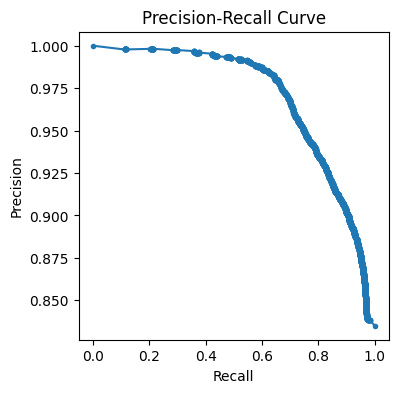

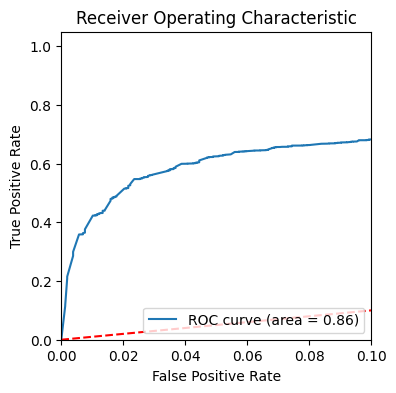

In [45]:
# Ensemble methods - Random Forest Classifier

rfc = RandomForestClassifier(verbose=True)
rfc.fit(X_over_reduced, y_over)
y_pred = rfc.predict(X_test_reduced)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)
print(f"Accuracy Percentage: {accuracy * 100:.2f}%")
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
getStatsFromModel(rfc)


The Random Forest Classifier model achieves an accuracy of 84.32%, with a precision of 83.03% and a recall of 84.32%. The F1-score is 83.52%, indicating strong overall performance. The model effectively predicts the positive class (1), though its performance for the negative class (0) remains less balanced.



## support vector classifier

In [47]:
from sklearn.svm import SVC
clf = SVC(kernel='linear', C=1.0)  # You can change the kernel and C as needed
clf.fit(X_over_reduced, y_over)

# Make predictions

y_pred = clf.predict(X_test_reduced)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)
print(f"Accuracy Percentage: {accuracy * 100:.2f}%")

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy:  0.7665757448594209
Accuracy Percentage: 76.66%
Confusion Matrix:
 [[1441  132]
 [2093 5866]]

Classification Report:
               precision    recall  f1-score   support

           0       0.41      0.92      0.56      1573
           1       0.98      0.74      0.84      7959

    accuracy                           0.77      9532
   macro avg       0.69      0.83      0.70      9532
weighted avg       0.88      0.77      0.79      9532



The SVM classifier achieves an accuracy of 76.66%, with high precision for the positive class (98.00%) and lower precision for the negative class (41.00%). The recall is high for the negative class (91.98%) and moderate for the positive class (74.00%). Overall, the model is effective at identifying positive instances but struggles with negative class precision.

## K-Nearest Neighbors (KNN)


In [89]:
#K-Nearest Neighbors (KNN)

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)  # You can change the value of K as needed
knn.fit(X_over_reduced, y_over)
y_pred = knn.predict(X_test_reduced)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)
print(f"Accuracy Percentage: {accuracy * 100:.2f}%")

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy:  0.76814939152329
Accuracy Percentage: 76.81%
Confusion Matrix:
 [[1146  427]
 [1783 6176]]

Classification Report:
               precision    recall  f1-score   support

           0       0.39      0.73      0.51      1573
           1       0.94      0.78      0.85      7959

    accuracy                           0.77      9532
   macro avg       0.66      0.75      0.68      9532
weighted avg       0.85      0.77      0.79      9532



The KNN classifier has an accuracy of 76.81%, with high precision (94.00%) and recall (77.77%) for the positive class. The negative class has lower precision (39.00%) but higher recall (72.13%). The model performs well overall but is better at predicting positive instances.








-----------------------------------


### Gaussian Naive Bayes - 73.58%

### Logistic Regression -  77.98%

### Decision Tree Classifier -  80.41%

### Ensemble methods  (Adaboost Classifier) - 80.41%

### Ensemble methods (Random Forest Classifier) - 84.32% (strong performance)

### SVM Classifier - 76.66%

### K-Nearest Neighbors (KNN) - 76.81%


### **Out of all classification models Ensemble method - Random Forest Classifier is gets more accuracy 84.32%**

### **Random Forest Classifier is best model with**
### **Accuracy 84.32%**
### **Precision: 83.03%**
### **Recall: 84.32%**
### **F1-Score: 83.52%**
